# **Examen final - Nava Siñani Kelvin Jherman **
# Ejercicio 2 - Rompecabezas 4x5 método implementación incremental

GITHUB https://github.com/Kel-340/InteligenciaArtificial

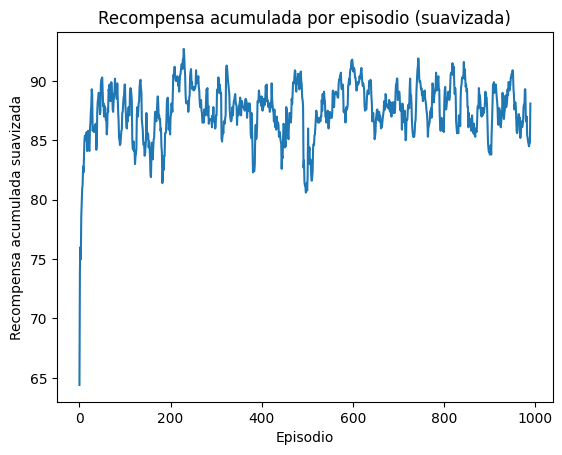

Tabla de Q-Values:
[[[ 42.61265878  48.45851     42.61265837  48.45850911]
  [ 48.36259086  54.9539      42.44695363  54.72383094]
  [ 52.69678742  62.1709983   43.43164502  53.63406972]
  [ 33.72571457  70.04974518  34.41767106  34.31936834]
  [ 16.14566818  76.77507688  22.03400375  14.40840296]]

 [[ 42.61265314  54.95389334  48.45850801  54.9539    ]
  [ 48.45850837  62.17099976  48.45850428  62.171     ]
  [ 54.95378853  70.19        54.95389038  70.18999945]
  [ 60.78576422  79.1         62.01958125  78.99046256]
  [ 58.53935432  88.99999371  69.29571412  77.62114174]]

 [[ 47.58314161  51.75410909  54.80555033  62.1709999 ]
  [ 54.94749508  68.65416644  54.9452693   70.19      ]
  [ 62.17099531  79.09997373  62.17099979  79.1       ]
  [ 70.18997407  88.99999599  70.18999838  89.        ]
  [ 79.09920793 100.          79.0998702   88.99993659]]

 [[ 44.55820295  30.53236961  32.38394753  66.66743791]
  [ 62.16786076  58.85278677  48.28096027  78.97674382]
  [ 69.30305312  76.589

In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Definimos el tamaño del rompecabezas
ROWS = 4
COLS = 5

# Definimos las acciones posibles: 0: arriba, 1: abajo, 2: izquierda, 3: derecha
ACTIONS = [0, 1, 2, 3]

# Parámetros de aprendizaje
alpha = 0.1  # Tasa de aprendizaje

# Inicializamos la tabla de acción-valor Q
Q = np.zeros((ROWS, COLS, len(ACTIONS)))

# Definimos una función para seleccionar una acción usando el método epsilon-greedy
def epsilon_greedy(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(ACTIONS)
    else:
        return np.argmax(Q[state[0], state[1]])

# Definimos una función para obtener el siguiente estado
def next_state(state, action):
    i, j = state
    if action == 0 and i > 0:
        i -= 1
    elif action == 1 and i < ROWS - 1:
        i += 1
    elif action == 2 and j > 0:
        j -= 1
    elif action == 3 and j < COLS - 1:
        j += 1
    return (i, j)

# Definimos una función para obtener la recompensa
def get_reward(state):
    if state == (ROWS - 1, COLS - 1):
        return 100
    else:
        return -1

# Entrenamos el agente
num_episodes = 1000
rewards_per_episode = []

for episode in range(num_episodes):
    state = (0, 0)
    total_reward = 0

    while state != (ROWS - 1, COLS - 1):
        action = epsilon_greedy(state, epsilon=0.5)
        next_state_ = next_state(state, action)
        reward = get_reward(next_state_)

        # Actualización incremental Q, formula de la implementación incremental
        #nuevo valor←viejo valor+ratio de cambio[valor objetivo−viejo valor]
        Q[state[0], state[1], action] += alpha * (reward - Q[state[0], state[1], action])

        state = next_state_
        total_reward += reward

    rewards_per_episode.append(total_reward)

# Aplicamos el filtro de media móvil para suavizar la gráfica de recompensa acumulada
window_size = 10
smoothed_rewards = np.convolve(rewards_per_episode, np.ones(window_size)/window_size, mode='valid')

# Graficamos la recompensa acumulada por episodio suavizada
plt.plot(smoothed_rewards)
plt.xlabel('Episodio')
plt.ylabel('Recompensa acumulada suavizada')
plt.title('Recompensa acumulada por episodio (suavizada)')
plt.show()

# Imprimimos la tabla de Q después del entrenamiento
print("Tabla de Q-Values:")
print(Q)
